In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import csv as csv 
import os 
from scipy.stats import linregress

In [3]:
crime_data = pd.read_csv("crime_and_incarceration_by_state_revised.csv")
crime_data.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,non-vioolent_crime
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,352090
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,46834
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,596616
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,200393


In [4]:
crime_data.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,non-vioolent_crime
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,352090
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,46834
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,596616
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,200393


In [25]:
tennessee_df = crime_data.loc[crime_data['jurisdiction'] == 'TENNESSEE']
tennessee_df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,non-vioolent_crime
42,TENNESSEE,False,2001,17466,False,False,5749398.0,42776.0,423.0,2196.0,NaN,10219.0,29938.0,252992.0,59705.0,165015.0,28272.0,516203
93,TENNESSEE,False,2002,18297,False,False,5789796.0,41562.0,420.0,2290.0,NaN,9413.0,29439.0,249399.0,61248.0,161610.0,26541.0,508211
144,TENNESSEE,False,2003,19141,False,False,5845208.0,40409.0,396.0,2129.0,NaN,9413.0,28471.0,256565.0,63323.0,166769.0,26473.0,522543
195,TENNESSEE,False,2004,19331,False,False,5893298.0,41113.0,357.0,2282.0,NaN,8863.0,29611.0,254991.0,60386.0,169828.0,24777.0,518845
246,TENNESSEE,False,2005,19270,False,False,5955745.0,45104.0,431.0,2194.0,NaN,10009.0,32470.0,256093.0,61508.0,169357.0,25228.0,522195


In [28]:
tennessee_df['inmate pop. as % pop'] = tennessee_df['prisoner_count']/tennessee_df['state_population']
tennessee_df.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,non-vioolent_crime,inmate pop. as % pop
42,TENNESSEE,False,2001,17466,False,False,5749398.0,42776.0,423.0,2196.0,NaN,10219.0,29938.0,252992.0,59705.0,165015.0,28272.0,516203,0.003038
93,TENNESSEE,False,2002,18297,False,False,5789796.0,41562.0,420.0,2290.0,NaN,9413.0,29439.0,249399.0,61248.0,161610.0,26541.0,508211,0.003160
144,TENNESSEE,False,2003,19141,False,False,5845208.0,40409.0,396.0,2129.0,NaN,9413.0,28471.0,256565.0,63323.0,166769.0,26473.0,522543,0.003275
195,TENNESSEE,False,2004,19331,False,False,5893298.0,41113.0,357.0,2282.0,NaN,8863.0,29611.0,254991.0,60386.0,169828.0,24777.0,518845,0.003280
246,TENNESSEE,False,2005,19270,False,False,5955745.0,45104.0,431.0,2194.0,NaN,10009.0,32470.0,256093.0,61508.0,169357.0,25228.0,522195,0.003236


Text(0, 0.5, 'Inmate Population as percent of total population')

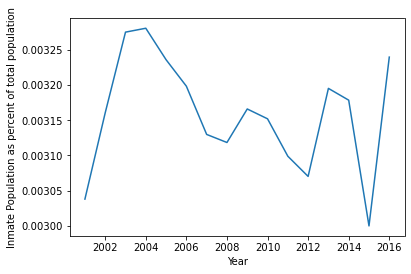

In [29]:
plt.plot(tennessee_df['year'], tennessee_df['inmate pop. as % pop'])
plt.xlabel("Year")
plt.ylabel("Inmate Population as percent of total population")

Text(0.5, 1.0, 'Tennessee inmate populations (2001-2016)')

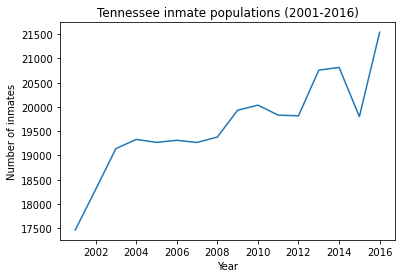

In [32]:
plt.plot(tennessee_df['year'], tennessee_df['prisoner_count'])
plt.xlabel("Year")
plt.ylabel("Number of inmates")
plt.title("Tennessee inmate populations (2001-2016)")

Text(0.5, 1.0, 'Southeast Inmate Count')

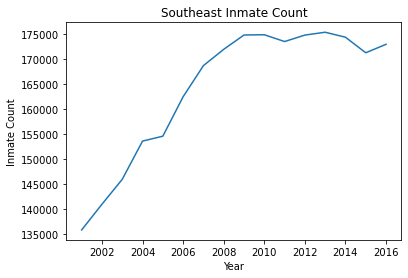

In [9]:
southeast_df = crime_data.loc[crime_data['jurisdiction'].isin(['TENNESSEE', 'GEORGIA', 'FLORIDA'])]
southeast_df.head()
grouped_df = southeast_df.groupby(['year'])['prisoner_count'].sum()
grouped_df.rename=["prisoner_count"]
grouped_df
southeast_dict = {
    "Year" : [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
    "prisoner_count" : [135807, 140952, 145943, 153600, 154578, 162481, 168711, 171976, 174843, 174901, 173536, 174830, 175399, 174407, 171287, 172982]
}
southeast_prisoner_df = pd.DataFrame(southeast_dict)
southeast_prisoner_df.head()
plt.plot(southeast_prisoner_df['Year'], southeast_prisoner_df['prisoner_count'])
plt.xlabel("Year")
plt.ylabel("Inmate Count")
plt.title("Southeast Inmate Count")
# georgia_df = crime_data.loc[crime_data['jurisdiction'] == 'GEORGIA']
# florida_df = crime_data.loc[crime_data['jurisdiction'] == ]

# southeast_df = crime_data.loc[crime_data['jurisdiction'] == 'GEORGIA']
# southeast_df = crime_data.loc[crime_data['jurisdiction'] == 'FLORIDA']

In [7]:
southeast_np_df = crime_data.loc[crime_data['jurisdiction'].isin(['MISSOURI', 'NORTH CAROLINA', 'ALABAMA'])]
southeast_np_df.head()
grouped_np_df = southeast_np_df.groupby(['year'])['prisoner_count'].sum()
grouped_np_df
southeast_np_dict = {
    "Year" : [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
    "prisoner_count" : [85519, 87813, 91352, 91861, 91376, 91944, 93316, 95457, 97893, 98297, 97444, 95351, 95500, 95396, 94395, 92142]
}
southeast_np = pd.DataFrame(southeast_np_dict)
southeast_np


,Year,prisoner_count
0,2001,85519
1,2002,87813
2,2003,91352
3,2004,91861
4,2005,91376
5,2006,91944
6,2007,93316
7,2008,95457
8,2009,97893
9,2010,98297


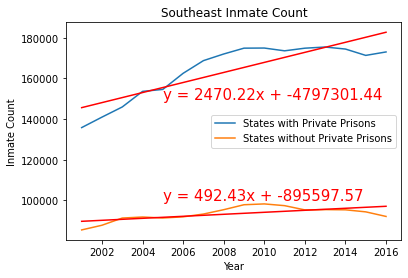

In [31]:
plt.plot(southeast_prisoner_df['Year'], southeast_prisoner_df['prisoner_count'])
plt.plot(southeast_np['Year'], southeast_np['prisoner_count'])
x_values = southeast_prisoner_df['Year']
y_values = southeast_prisoner_df['prisoner_count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
r2_value_1 = rvalue**2
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x_values_2 = southeast_np['Year']
y_values_2 = southeast_np['prisoner_count']
(slope, intercept, rvalue_2, pvalue, stderr) = linregress(x_values_2, y_values_2)
regress_values_2 = x_values_2 * slope + intercept
r2_value_2 = rvalue_2**2
line_eq_2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values_2,regress_values_2,"r-")
plt.annotate(line_eq_2,(2005, 100000),fontsize=15, color="red")
plt.annotate(line_eq,(2005,150000),fontsize=15,color="red")
plt.xlabel("Year")
plt.ylabel("Inmate Count")
plt.title("Southeast Inmate Count")
plt.legend(['States with Private Prisons', 'States without Private Prisons'])

In [32]:
print(r2_value_1)

0.7534706119869752


In [33]:
print(r2_value_2)

0.44418117601673357


In [23]:
non_violent_temp = crime_data.loc[crime_data['year'] == 2001].sum()
non_violent_total_2001 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2002].sum()
non_violent_total_2002 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2003].sum()
non_violent_total_2003 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2004].sum()
non_violent_total_2004 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2005].sum()
non_violent_total_2005 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2006].sum()
non_violent_total_2006 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2007].sum()
non_violent_total_2007 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2008].sum()
non_violent_total_2008 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2009].sum()
non_violent_total_2009 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2010].sum()
non_violent_total_2010 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2011].sum()
non_violent_total_2011 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2012].sum()
non_violent_total_2012 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2013].sum()
non_violent_total_2013 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2014].sum()
non_violent_total_2014 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2015].sum()
non_violent_total_2015 = non_violent_temp['non-vioolent_crime']
non_violent_temp = crime_data.loc[crime_data['year'] == 2016].sum()
non_violent_total_2016 = non_violent_temp['non-vioolent_crime']

In [24]:
non_violent_summary_dict = {
    "year": [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
    "total": [non_violent_total_2001, non_violent_total_2002, non_violent_total_2003, non_violent_total_2004, non_violent_total_2005, non_violent_total_2006, non_violent_total_2007, non_violent_total_2008, non_violent_total_2009, non_violent_total_2010, non_violent_total_2011, non_violent_total_2012, non_violent_total_2013, non_violent_total_2014, non_violent_total_2015, non_violent_total_2016]
}

non_violent_summary_df = pd.DataFrame(non_violent_summary_dict)
non_violent_summary_df

,year,total
0,2001,21223691
1,2002,21254572
2,2003,21230626
3,2004,20983248
4,2005,20710980
5,2006,20430491
6,2007,20149639
7,2008,19927015
8,2009,19021468
9,2010,18532410


Text(0, 0.5, 'Number of non-violent crimes in tens of millions')

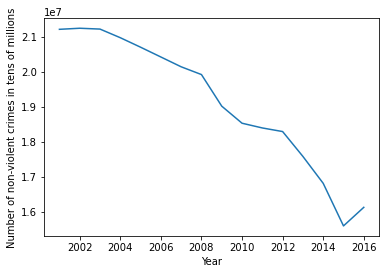

In [25]:
plt.plot(non_violent_summary_df['year'], non_violent_summary_df['total'])
plt.xlabel("Year")
plt.ylabel("Number of non-violent crimes in tens of millions")

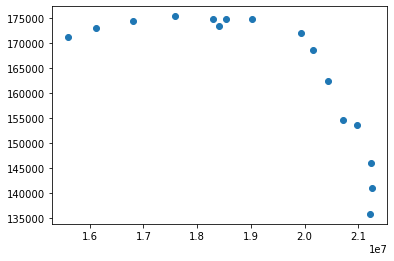